## Complex operations

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
data = pd.read_csv('data/nyc_data.csv', parse_dates=['pickup_datetime',
                                                     'dropoff_datetime'])
fare = pd.read_csv('data/nyc_fare.csv', parse_dates=['pickup_datetime'])

### Group-by

In [5]:
weekly = data.groupby(data.pickup_datetime.dt.weekofyear)

In [6]:
len(weekly)

52

In [11]:
import pprint
pprint.isreadable(weekly)

False

In [13]:
y = weekly.size()
y.head(3)

pickup_datetime
1    17042
2    15941
3    17017
dtype: int64

In [15]:
x = weekly.pickup_datetime.first()
x.head(3)

pickup_datetime
1   2013-01-01 00:00:00
2   2013-01-07 00:03:00
3   2013-01-14 00:00:51
Name: pickup_datetime, dtype: datetime64[ns]

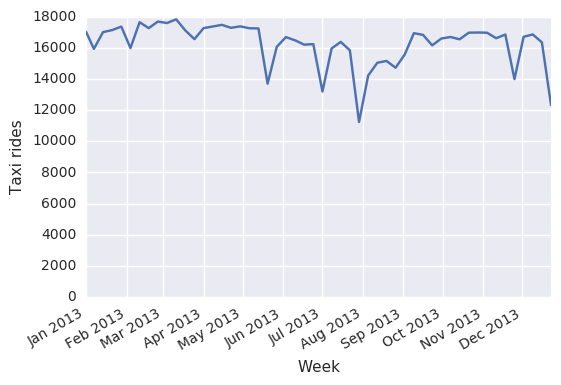

In [18]:
pd.Series(y.values, index=x).plot()
plt.ylim(0)  # Set the lower y value to 0.
plt.xlabel('Week')  # Label of the x axis.
plt.ylabel('Taxi rides')  # Label of the y axis.

### Joins

In [19]:
tip = fare[['medallion', 'tip_amount']] \
      .loc[fare.tip_amount>0].groupby('medallion').mean()
print(len(tip))
tip.head(3)

13407


,tip_amount
medallion,
00005007A9F30E289E760362F69E4EAD,1.815854
000318C2E3E6381580E5C99910A60668,2.857222
000351EDC735C079246435340A54C7C1,2.099111


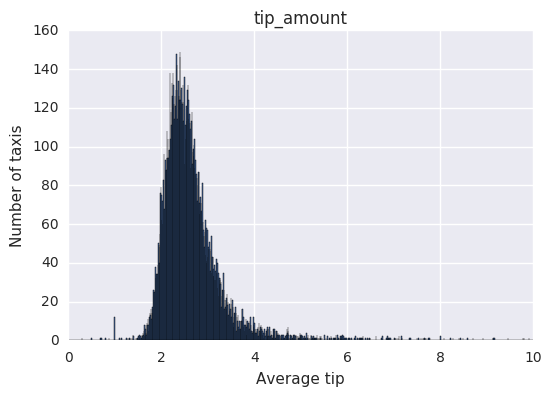

In [23]:
tip.hist(bins=np.linspace(0., 10.0, 1000))
plt.xlabel('Average tip')
plt.ylabel('Number of taxis')

In [9]:
data_merged = pd.merge(data, tip, how='left', left_on='medallion', right_index=True)
data_merged.head(3)